# Data

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
import os
from urllib.request import urlretrieve

import pandas as pd

FREMONT_URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'


def get_data(filename='fremont.csv', url=FREMONT_URL, force_download=False):
    """
    Download and cache fremont data

    Parameters
    ----------
    filename : string (optional)
        location to save the data
    url : string (optional)
        web location of the data
    force_download : bool (optional)
        if True, force download of data
    Returns
    -------
        data : pandas.DataFrame
            the fremont bridge data
    """
    if force_download or not os.path.exists(filename):
        # Download the data
        urlretrieve(url, './data/fremont.csv')
    # Read data from downloaded CSV file
    data = pd.read_csv('./data/fremont.csv',
                       index_col='Date',
                       parse_dates=True)
    return data

In [6]:
data = get_data()
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


<AxesSubplot:xlabel='Date'>

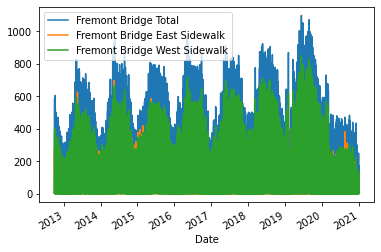

In [12]:
# Visualize data
data.plot()

<AxesSubplot:xlabel='Date'>

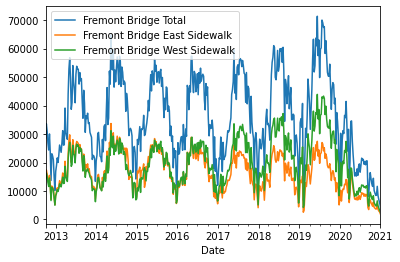

In [13]:
# Get the sum of rides weekly by using 'W'
data.resample('W').sum().plot()

In [14]:
# Change the syle of plotting
plt.style.use('seaborn')

In [16]:
data.columns

Index(['Fremont Bridge Total', 'Fremont Bridge East Sidewalk',
       'Fremont Bridge West Sidewalk'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

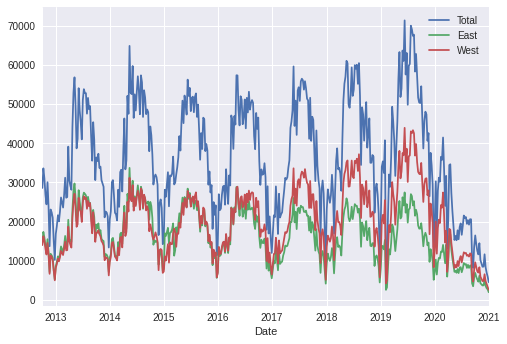

In [17]:
# Changing the legend of plot
data.columns = ['Total', 'East', 'West']

# Plot the data for each week
data.resample('W').sum().plot()

<AxesSubplot:xlabel='Date'>

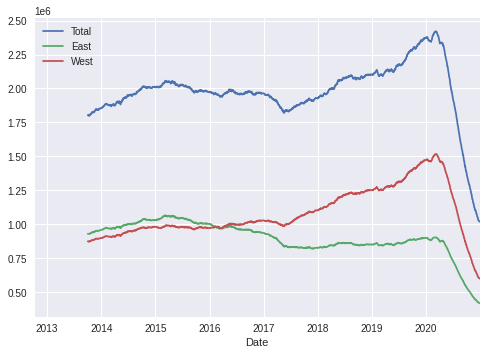

In [20]:
data.resample('D').sum().rolling(365).sum().plot()

(0.0, 2520524.1)

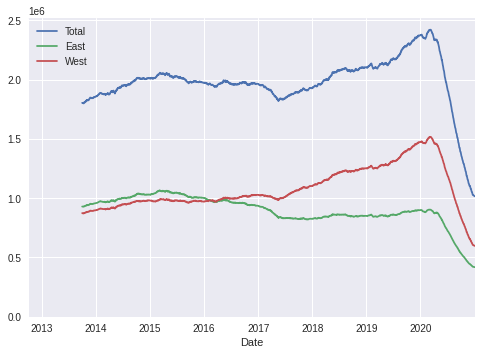

In [21]:
ax = data.resample('D').sum().rolling(365).sum().plot()
# We don't see zero in plot so we can change limit of y axis to minimum 0 and maximom of value exist in data (i.e. set to None)
ax.set_ylim(0,None)

<AxesSubplot:xlabel='time'>

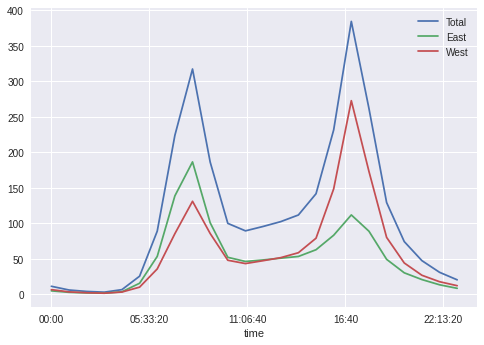

In [22]:
# Look at the trend in the individual days
data.groupby(data.index.time).mean().plot()

In [23]:
pivoted = data.pivot_table('Total',
                           index=data.index.time,
                           columns=data.index.date)

pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

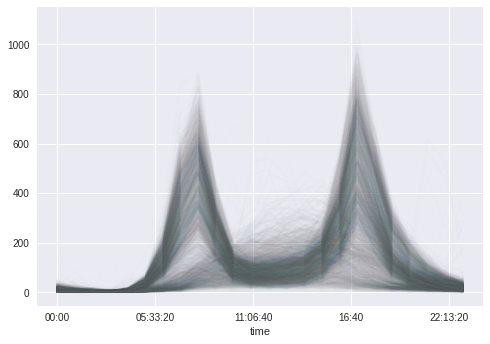

In [25]:
pivoted.plot(legend=False, alpha = 0.01)

# Git

Clone a created repository of github and then move the jupyter notebook to the git directory    

`clone git@github.com:alifta/ReproducibleDataAnalysis.git`    
`git status`    
`git add ReproducibleDataAnalysis.ipynb`    
`git commit -m "Add initial notebook`    
`git push origin`    

# Improving Data

In [ ]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'